# SHapley Additive exPlanations

## Abstarct:
In this notebook, I am explaining and implementing the concepts of SHapley Additive exPlanations for the Spotify app intsall dataset (regression dataset).I will be breifing about what the Shapley value is and how the SHAP (SHapley Additive exPlanations) value emerges from the Shapley concept. I will demonstrate to you how SHAP values increase model transparency. This notebook also comes with Python code for real-time Spotify app intsall dataset.

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature.

SHAP can be used in :

> A model says a bank shouldn't loan someone money, and the bank is legally required to explain the basis for each loan rejection

> A healthcare provider wants to identify what factors are driving each patient's risk of some disease so they can directly address those risk factors with targeted health interventions

## Working of SHAP

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value

SHAP Value is a great tool in Explainable AI or Trusted AI

SHAP value increases the model transparency

Shapely value is the average of marginal contributions across all permutations.

The SHAP (SHAdditive explanations) deserves its own space rather than extension of the shapely value.

SHAP values as a united approach to explaining the output of any machine learning model.


## Benefits of SHAP-

1) global interpretable by-the collective SHAP values can show how much each pferedictol contributes, either positively or negatively to the target variable

2) local interpretable- each observation gets its own set of SHAP values which increases its transparency 

3) SHAP values can be calculated for any tree-based model, while other methods use linear regression or logistic regression models as the surrogate models.

<img src ="shap.png" alt="shap" width="450">

## Better Interpretability Leads to Better Adoption

Is a highly-trained model easy to understand? 

A sophisticated machine learning algorithms usually can produce accurate predictions, but its notorious “black box” nature does not help adoption at all.

Hence, SHapley Additive exPlanations comes into picture.

The SHAP value also is an important tool in Explainable AI or Trusted AI, an emerging development in AI.


## What is the Shapley Value?

Explaining  the Shapley value with a story: Assume Ann, Bob, and Cindy together were hammering an “error” wood log, 38 inches, to the ground. The question is “What is everyone’s contribution (in inches)?”

<img src ="log.png" alt="log" width="450">

To understand everyone's contribution, we can create a permutations as given in the table A below.

<img src ="premutation.png" alt="premutation" width="450">

When the ordering is A, B, C, the marginal contributions of the three are 2, 32, and 4 inches respectively.

The table shows the coalition of (A,B) or (B,A) is 34 inches, so the marginal contribution of C to this coalition is 4 inches.

Taking the avergae of the all the permutations for each person to get each individual’s contribution: Ann is 2 inches, Bob is 32 inches and Cindy is 4 inches.

That’s the way to calculate the Shapley value: *It is the average of the marginal contributions across all permutations.*

The wood log the “error” log for a special reason: It is the loss function in the context of machine learning. 
The “error” is the difference between the actual value and prediction. 
The hammers are the predictors to attack the error log. How to measure the contributions of the hammers (predictors)? 

Solution- **The Shapley values!**

Mathematical way of defining SHAP values:

<img src ="math_shap.png" alt="math_shap" width="450">

#### Model Interpretability Does Not Mean Causality
It is important to point out the SHAP values do not provide causality.

### Data Visualization and Model Explainability

Data visualization and model explainability are two integral aspects in a data science project. They are the binoculars that help to see the patterns in the data and the stories in the model. 



The SHAP values do not identify causality, which is better identified by experimental design or similar approaches.

## How to Use SHAP in Python?

Using Spotify app install dataset to do the analysis.

Considering the target value of this dataset is spend : Total money spent for that day.

The input variables are the content of performance from Spotify Campaigns on a daily basis. 



In [2]:
#Install shap
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 

In [3]:
# Reading data through pandas read_csv
data = pd.read_csv('spotify_appinstall.csv', delimiter=',')

In [20]:
# Calculating statistical data
data.describe()

,day,campaign_id,placement_id,spend,impressions,clicks,registrations,installs
count,325513.000000,3.255130e+05,3.255130e+05,325513.000000,3.078570e+05,307857.000000,325513.000000,325513.000000
mean,137.443534,2.350226e+07,2.661962e+08,22.670294,5.132530e+04,225.374170,8.728674,24.468150
std,64.803241,8.106332e+04,5.472457e+06,107.634081,1.992409e+05,914.922187,36.122713,95.251362
min,1.000000,2.348466e+07,2.610134e+08,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,92.000000,2.348466e+07,2.613228e+08,0.048810,1.790000e+02,1.000000,0.000000,0.000000
50%,144.000000,2.348466e+07,2.623188e+08,0.725389,2.039000e+03,12.000000,0.000000,1.000000
75%,192.000000,2.348466e+07,2.704703e+08,8.059408,1.942300e+04,89.000000,3.000000,10.000000
max,240.000000,2.394376e+07,2.806390e+08,4647.179162,5.917242e+06,32920.000000,1623.000000,3037.000000


In [4]:
# Define the target
Y = (data['spend'])
Y.head()

0       0.000000
1     215.198170
2      51.326582
3       3.279612
4    3131.723462
Name: spend, dtype: float64

In [5]:
# Selecting columns with int data type 
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]

In [6]:
# Creating dataframe for the selected features
X = data[feature_names]

X.head()

,day,campaign_id,placement_id,registrations,installs
0,1,23484661,262318577,0,0
1,2,23574660,262032172,7,13
2,2,23574660,261712577,1,2
3,2,23574660,262031116,0,0
4,2,23574660,262129875,153,317


In [7]:
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

### **A) Variable Importance Plot — Global Interpretability**

The `shap.summary_plot` function with `plot_type=”bar”` will produce the
variable importance plot. A variable importance plot lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

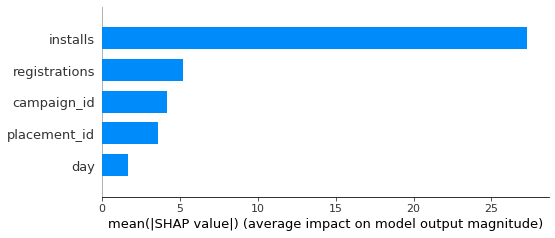

In [8]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)

#Global interpretability
shap.summary_plot(shap_values, X_train, plot_type="bar")

The SHAP value plot can further show the positive and negative relationships of the predictors with the target variable. The code 
`shap.summary_plo(shap_values, X_train) `produces the following plot:

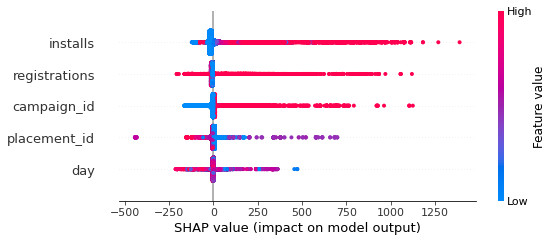

In [10]:
import matplotlib.pyplot as plt
f = plt.figure()

#Postive and negative relationships of the predictors with target variable
shap.summary_plot(shap_values, X_train)

### Observations from the graph

This plot is made of all the dots in the train data. It demonstrates the following information:

***Feature importance:*** Variables are ranked in descending order.

***Impact:*** The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

***Original value:*** Color shows whether that variable is high (in red) or low (in blue) for that observation.

***Correlation:*** A high level of the “installs” content has a high and positive impact on the spend. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, the “registrations” is negatively correlated with the target variable.

### **(B) SHAP Dependence Plot — Global Interpretability**

The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model.

It tells whether the relationship between the target and a feature is linear, monotonic or more complex. 

In order to create a dependence plot, code used is:
`shap.dependence_plot(0, shap_values, X_train)`

The function automatically includes another variable that the chosen variable interacts most with.





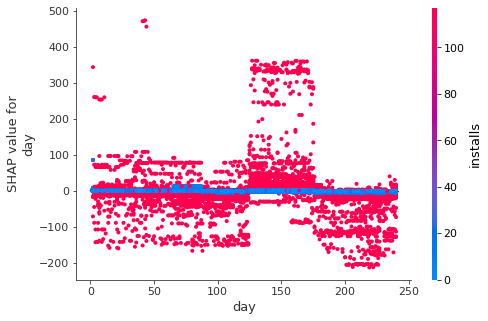

In [11]:
# The first argument is the index of the feature we want to plot
# The second argument is the matrix of SHAP values (it is the same shape as the data matrix)
# The third argument is the data matrix (a pandas dataframe or numpy array
shap.dependence_plot(0, shap_values, X_train)

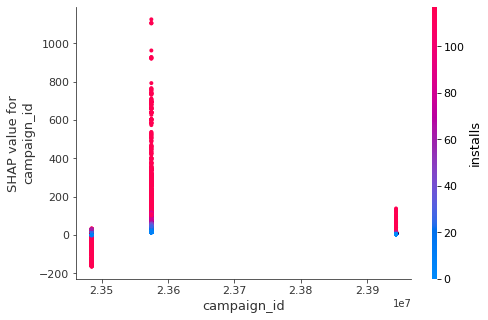

In [12]:
shap.dependence_plot(1, shap_values, X_train)

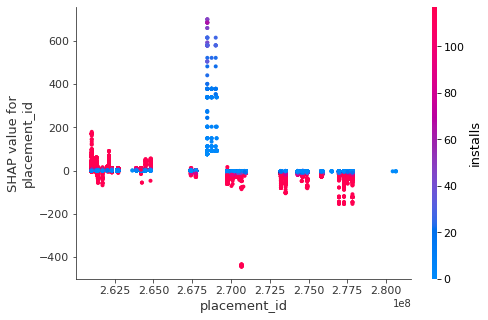

In [13]:
shap.dependence_plot(2, shap_values, X_train)

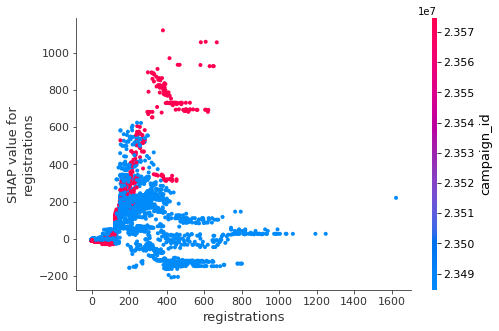

In [14]:
shap.dependence_plot(3, shap_values, X_train)

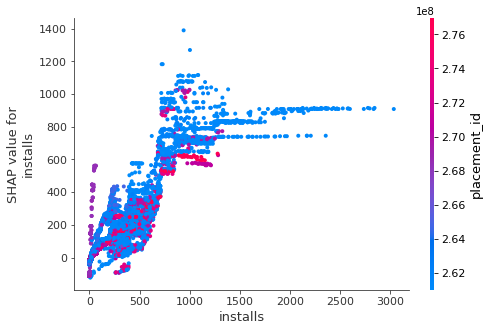

In [15]:
shap.dependence_plot(4, shap_values, X_train)

### **(C) Individual SHAP Value Plot — Local Interpretability**

The code `shap.force_plot() takes three values` takes: 

the base value (explainerModel.expected_value[0]),
 
the SHAP values (shap_values_Model[j][0]) and the matrix of feature values (S.iloc[[j]]). 

The base value or the expected value is the average of the model output over the training data X_train. It is the base value used in the following plot.

In [16]:
# Initialize Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [17]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S

,day,campaign_id,placement_id,registrations,installs,predict
165542,146,23484661,261315550,0,0,0.29
193182,163,23484661,261319729,0,4,5.54
288321,218,23484661,273519802,143,563,459.11
124559,119,23484661,270557712,4,8,6.12
269095,207,23484661,270563559,0,0,0.29
168702,148,23484661,261421536,7,29,42.02
310018,230,23484661,261415479,2,16,18.59


The result for the first row of the above table is shown below:

In [18]:
shap_plot(0)

In [21]:
Y_test.mean()

22.4725756092501

In [22]:
#Average value of predictors
X_train.mean()

day              1.375026e+02
campaign_id      2.350225e+07
placement_id     2.661991e+08
registrations    8.776837e+00
installs         2.459673e+01
dtype: float64

### Understanding the plot in detail:

The output value is the prediction for that observation (the prediction of the first row in Table is 0.29).

The base value: E(y_hat) is “the value that would be predicted if we did not know any features for the current output.” In other words, it is the mean prediction, or mean(yhat). You may wonder why it is 22.81. This is because the mean prediction of Y_test is 22.81. Y_test.mean() which produces 22.81.

Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

Day and placement_id: has a positive impact on the performance from Spotify Campaigns on a daily basis. The value of day is 146 which is greater than average value 1.3750. So it pushes the prediction to the right. Similarly, the value of placement_id is equal to average value(2.6).

Installs, regristration and campaign_id: has a negative impact on the performance from Spotify Campaigns. A lower than the average installs (=0 < 2.45) drives the prediction to the right. It also has negative impact on regristration as the value is lower than average regristration(=0 <8.77) drives the prediction to the right. Similarly, campaign_id has negative impact as the value of campaign_id is less than average value(2.34 < 2.35).



The result for the second row of the above table is shown below:

In [23]:
shap_plot(1)

The result for the third row of the above table is shown below:

In [24]:
shap_plot(2)

## Conclusion:

I have explained the concepts of SHAP values along with code implemetation of the same for the real-time Spotify Campaigns dataset to interpert the performance from Spotify Campaigns on a daily basis

## References

1. Explain Your Model with the SHAP Values - https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

2. SHAP Values - https://www.kaggle.com/dansbecker/shap-values

3. SHAP Up! - https://medium.com/abhi-kar/shap-up-51a059fbd9a9


Copyright 2020 Pranatha Rajaprasad Rao

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.